In [1]:
from matplotlib import pyplot as plt # 
import numpy as np # 
import pandas as pd #
import rasterio #
import xarray as xr #
import rioxarray #
from mesma.core import mesma, hard_classification #

In [5]:
GAO_cl = rioxarray.open_rasterio("C:\\Users\\mkoenig3\\Dropbox (ASU)\\Backup\\Downloads\\2022_PHX\\SOL\\20221206_23EM\\GAO20220716t191531p0000_iacorn_refl_ort_sub_classification.tif")

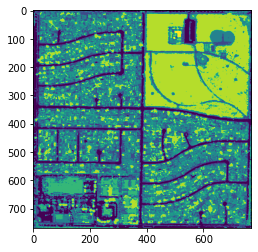

In [7]:
plt.imshow(GAO_cl[0])

In [9]:
CM_cl = rioxarray.open_rasterio("C:\\Users\\mkoenig3\\Dropbox (ASU)\\Backup\\Downloads\\2022_PHX\\TEST\\GAO20220716t191531p0000_iacorn_refl_ort_1b_30m.dat")

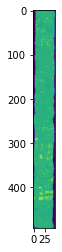

In [10]:
plt.imshow(CM_cl[0])

In [119]:
out = GAO_cl.rio.reproject_match(match_data_array=CM_cl, resampling = rasterio.enums.Resampling.mode)

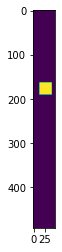

In [120]:
plt.imshow(out[0])

In [121]:
y = out[0,163:191,14:42].astype(int)

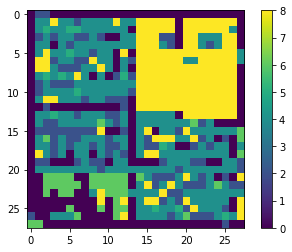

In [122]:
plt.imshow(y)
plt.colorbar()

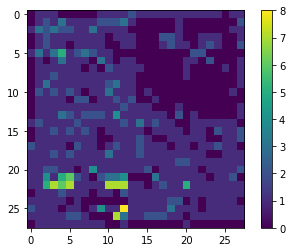

In [123]:
x = (CM_cl[0,163:191,14:42]/CM_cl[0,163:191,14:42].max()*8).astype(int)

plt.imshow(x)
plt.colorbar()

In [124]:
from sklearn import metrics

print(metrics.classification_report(x.data.ravel(),y.data.ravel()))

              precision    recall  f1-score   support

           0       0.29      0.23      0.26       238
           1       0.00      0.00      0.00       431
           2       0.15      0.21      0.18        76
           3       0.00      0.00      0.00        21
           4       0.00      0.20      0.01         5
           5       0.00      0.00      0.00         4
           6       0.05      1.00      0.09         2
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1

    accuracy                           0.09       784
   macro avg       0.06      0.18      0.06       784
weighted avg       0.10      0.09      0.10       784



C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [129]:
print(metrics.precision_recall_fscore_support(x.data.ravel(),y.data.ravel())[0] * 100)

[29.41176471  0.         15.09433962  0.          0.4         0.
  4.65116279  0.          0.        ]


C:\Users\mkoenig3\Anaconda3\envs\CarbonMapper_py3713\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
